<a href="https://colab.research.google.com/github/LonelyFriday/datamining_chula/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple Linear Regression

In [ ]:
!python --version

Python 3.9.16


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# location right now
!pwd 
# chanage directory 
%cd '/content/drive/MyDrive/dataMining'

/content
/content/drive/MyDrive/dataMining


#Prerequisites

In [ ]:
# Import library

# Machine learning
import sklearn

# Data preprocessing
import pandas as pd
import numpy as np

# Visualization tool
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import dataset
df = pd.read_excel('dataset_MLR.xlsx')
print(f'Number of rows and columns are: ', df.shape)
print('')
df.head(10)

Number of rows and columns are:  (1338, 7)



,sex,age,smoker,region,BMI,#children,amout
0,male,55,no,W,29.90,0,10214.63600
1,female,35,no,S,35.86,2,5836.52040
2,male,34,no,W,32.80,1,14358.36437
3,female,19,no,W,18.60,0,1728.89700
4,female,39,no,S,23.87,5,8582.30230
5,male,50,no,N,30.97,3,10600.54830
6,female,18,no,E,31.92,0,2205.98080
7,female,18,no,S,36.85,0,1629.83350
8,female,21,no,W,25.80,0,2007.94500
9,female,61,yes,N,29.07,0,29141.36030


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        1338 non-null   object 
 1   age        1338 non-null   int64  
 2   smoker     1338 non-null   object 
 3   region     1338 non-null   object 
 4   BMI        1338 non-null   float64
 5   #children  1338 non-null   int64  
 6   amout      1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Data Preprocessing

Text(0.5, 1.0, 'Missing value')

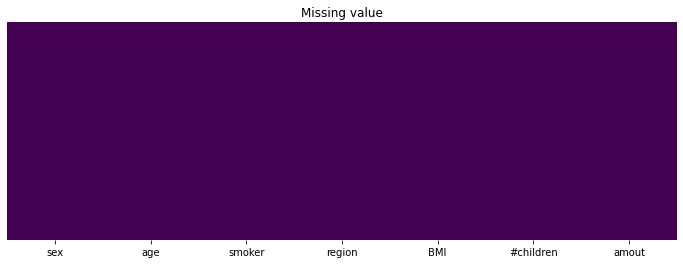

In [ ]:
# Check missing data
plt.figure(figsize = (12, 4))
sns.heatmap(df.isnull(),
            cbar = False,
            cmap = 'viridis',
            yticklabels = False)
plt.title('Missing value')

In [ ]:
# Data Transformation by One Hot Encoding   
dum_sex = pd.get_dummies(df['sex'], prefix = 'OHE', drop_first=True)
dum_smoker = pd.get_dummies(df['smoker'], prefix = 'OHE', drop_first=True)
dum_region = pd.get_dummies(df['region'], prefix = 'OHE', drop_first=True)

# Adding dum_param into dataset
df = pd.concat([df, dum_sex, dum_smoker, dum_region], axis=1)

# Remove the categorical data
df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

# Check
print(f'Number of rows and columns are: ', df.shape)
print('')
df.head(10)

Number of rows and columns are:  (1338, 9)



,age,BMI,#children,amout,OHE_male,OHE_yes,OHE_N,OHE_S,OHE_W
0,55,29.90,0,10214.63600,1,0,0,0,1
1,35,35.86,2,5836.52040,0,0,0,1,0
2,34,32.80,1,14358.36437,1,0,0,0,1
3,19,18.60,0,1728.89700,0,0,0,0,1
4,39,23.87,5,8582.30230,0,0,0,1,0
5,50,30.97,3,10600.54830,1,0,1,0,0
6,18,31.92,0,2205.98080,0,0,0,0,0
7,18,36.85,0,1629.83350,0,0,0,1,0
8,21,25.80,0,2007.94500,0,0,0,0,1
9,61,29.07,0,29141.36030,0,1,1,0,0


#Model construction

In [ ]:
from sklearn.model_selection import train_test_split

# Feature and Label
X = df.drop(['amout'], axis=1)
y = df['amout'].values.reshape(-1, 1)

# Split data to train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
# Applying into Linear Regression model
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
model = linReg.fit(X_train, y_train)

In [ ]:
# Create param dataframe
parameter = ['theta_' + str(i) for i in range(X_train.shape[1] + 1)]
columns = ['intercept'] + list(X_train.columns.values)

In [ ]:
# Get sk_theta
sk_theta = list(model.intercept_) + list(model.coef_.flatten())
sk_theta

[-10586.495358812579,
 247.6886000802213,
 317.5160408910334,
 493.333705639273,
 -168.48374540115927,
 24254.69473297456,
 -843.2090986961039,
 -1226.9803402023185,
 -1238.0577365537574]

In [ ]:
# params dataframe
param_df = pd.DataFrame({
    'parameter': parameter,
    'columns': columns,
    'theta_value': list(sk_theta)
})

param_df

,parameter,columns,theta_value
0,theta_0,intercept,-10586.495359
1,theta_1,age,247.688600
2,theta_2,BMI,317.516041
3,theta_3,#children,493.333706
4,theta_4,OHE_male,-168.483745
5,theta_5,OHE_yes,24254.694733
6,theta_6,OHE_N,-843.209099
7,theta_7,OHE_S,-1226.980340
8,theta_8,OHE_W,-1238.057737


#Evaluation

In [ ]:
# Using model to predict the value
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics

# MAE
MAE = metrics.mean_absolute_error(y_test, y_pred)

# MSE
MSE = metrics.mean_squared_error(y_test, y_pred, squared=True)

# RMSE
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE is', MAE)
print(f'MSE is', MSE)
print(f'RMSE is', RMSE)
print(f'The model score is', model.score(X_test, y_test))

MAE is 4185.128367656449
MSE is 35306555.6979572
RMSE is 5941.9319836192335
The model score is 0.7483637283880346


#Inclass Exercise

In [ ]:
# Take log(amout)
df['log_amout'] = np.log10(df['amout'])

In [ ]:
# Feature and Label
X = df.drop(['amout', 'log_amout'], axis=1)
y = df['log_amout'].values.reshape(-1, 1)

# Split data to train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
# Applying into Linear Regression model
linReg = LinearRegression()
model = linReg.fit(X_train, y_train)

In [ ]:
# Create param dataframe
parameter = ['theta_' + str(i) for i in range(X_train.shape[1] + 1)]
columns = ['intercept'] + list(X_train.columns.values)

# Get sk_theta
sk_theta = list(model.intercept_) + list(model.coef_.flatten())

# params dataframe
param_df = pd.DataFrame({
    'parameter': parameter,
    'columns': columns,
    'theta_value': list(sk_theta)
})

param_df

,parameter,columns,theta_value
0,theta_0,intercept,3.099156
1,theta_1,age,0.014846
2,theta_2,BMI,0.004769
3,theta_3,#children,0.044862
4,theta_4,OHE_male,-0.033399
5,theta_5,OHE_yes,0.673279
6,theta_6,OHE_N,-0.037763
7,theta_7,OHE_S,-0.070361
8,theta_8,OHE_W,-0.051112


In [ ]:
# Using model to predict the value
y_pred = model.predict(X_test)

In [ ]:
# MAE
MAE = metrics.mean_absolute_error(y_test, y_pred)

# MSE
MSE = metrics.mean_squared_error(y_test, y_pred, squared=True)

# RMSE
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE is', MAE)
print(f'MSE is', MSE)
print(f'RMSE is', RMSE)
print(f'The model score is', model.score(X_test, y_test))

MAE is 0.11623757338152278
MSE is 0.02912763481050396
RMSE is 0.17066820093533522
The model score is 0.818999918119227


email TA = 6470196421@student.chula.ac.th